# Trabajo Práctico N°2: "Un primer encuentro con la EPH"

## Parte I: Familiarizándonos con la base EPH y limpieza

### Elección de región y unificación de microdatos

Región elegida: Noreste (código: 41)

In [2]:
import os
import numpy as np
import pandas as pd
import openpyxl as pyxl

Comenzamos el proceso de recorte y limpieza de datos:

In [3]:
# Obtener la ruta del directorio actual 
ruta = os.getcwd()
print(ruta)

C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2


In [4]:
# Importación de bases de datos. Las rutas de acceso que se leen en el output de esta celda deben ser modificadas de acuerdo al directorio propio.

db05_raw = pd.read_stata(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T105.dta")
db25_raw = pd.read_excel(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T125.xlsx")

In [5]:
# Verificación de importación 1
db05_raw.describe().round()

,nro_hogar,ano4,pondera,pp03d,pp3e_tot,pp3f_tot,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,...,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,ipcf
count,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,...,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0,47030.0
mean,1.0,2005.0,495.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,9.0,2.0,0.0,7.0,79.0,1315.0,359.0
std,0.0,0.0,467.0,0.0,38.0,16.0,0.0,1.0,1.0,1.0,...,22.0,35.0,15.0,67.0,267.0,2.0,56.0,385.0,1365.0,443.0
min,1.0,2005.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,2005.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,125.0
50%,1.0,2005.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950.0,236.0
75%,1.0,2005.0,538.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1660.0,442.0
max,6.0,2005.0,5707.0,9.0,999.0,999.0,6.0,99.0,99.0,99.0,...,3000.0,4000.0,1300.0,3000.0,50000.0,180.0,2500.0,50000.0,52050.0,13012.0


In [6]:
# Verificación de importación 2
db25_raw.describe().round()

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
count,45425.0,45425.0,45425.0,45425.0,45425.0,45425.0,45425.0,45425.0,45425.0,45425.0,...,45425.0,45425.0,45425.0,45425.0,33482.0,33482.0,14933.0,18549.0,29140.0,33482.0
mean,2025.0,1.0,1.0,2.0,1.0,36.0,23.0,657.0,2.0,2.0,...,841.0,1774.0,1939.0,1172.0,5.0,6.0,5.0,6.0,5.0,6.0
std,0.0,0.0,1.0,2.0,0.0,15.0,17.0,867.0,2.0,0.0,...,9978.0,15706.0,11682.0,9142.0,3.0,3.0,3.0,3.0,3.0,3.0
min,2025.0,1.0,1.0,1.0,0.0,1.0,2.0,21.0,1.0,1.0,...,-9.0,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2025.0,1.0,1.0,1.0,1.0,40.0,10.0,181.0,1.0,1.0,...,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0
50%,2025.0,1.0,1.0,2.0,1.0,42.0,22.0,319.0,2.0,2.0,...,0.0,0.0,0.0,0.0,5.0,6.0,5.0,6.0,6.0,6.0
75%,2025.0,1.0,1.0,3.0,1.0,43.0,32.0,684.0,3.0,2.0,...,0.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0
max,2025.0,1.0,72.0,56.0,2.0,44.0,93.0,8257.0,10.0,2.0,...,450000.0,600000.0,350000.0,342550.0,10.0,10.0,10.0,10.0,10.0,10.0


In [7]:
# Recortamos los datasets
db05 = db05_raw[db05_raw["region"] == "NEA"].copy()
db25 = db25_raw[db25_raw["REGION"] == 41].copy()

In [8]:
# Verificación de recorte 1
db05.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5453 entries, 18832 to 24284
Columns: 176 entries, CODUSU to idimpp
dtypes: category(94), float64(46), object(36)
memory usage: 4.0+ MB


In [9]:
# Verificación de recorte 2
db25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 14 to 45413
Columns: 235 entries, CODUSU to P_ADECCF
dtypes: float64(150), int64(80), object(5)
memory usage: 8.5+ MB


In [10]:
# Convertir de categorical a object
db05['region'] = db05['region'].astype('object')
# Ahora reemplazamos para luego poder hacer el join mediante el código '41'
db05.loc[db05['region'] == 'NEA', 'region'] = 41

print(db05['region'].unique())
print(db25['REGION'].unique())

[41]
[41]


In [11]:
#Para el proceso de elección de variables, empezamos descartando aquellas variables que figuren sólo en uno de ambos Datasets.
#Evaluamos cuáles son:
db05.columns = db05.columns.str.upper()
cols05 = list(db05.columns.str.upper())
cols25 = list(db25.columns)

In [12]:
cols05_filtro = []
cols05_descarte = []

for col in cols05:
    if col in cols25:
        cols05_filtro.append(col)
    else:
        cols05_descarte.append(col)

print(cols05_filtro)
print()

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [13]:
cols25_nuevas = []
cols25_viejas = []
for col in cols25:
    if col not in cols05:
        cols25_nuevas.append(col)
    else:
        cols25_viejas.append(col)

In [14]:
# Chequeo de que las 'Variables 2005 que perduraron' (cols05_filtro) son exactamente las 'Variables 2025 que ya existían' (cols25_viejas)
errorcheck = []

for col in cols05_filtro:
    if col not in cols25_viejas:
        errorcheck.append(col)
    else:
        pass
print(errorcheck) # Si está vacío, se implementó bien el cruce

[]


In [15]:
# Ahora recortamos ambos datasets para quedarnos sólo con las columnas compartidas entre ambos
db05_new = db05[cols05_filtro]
db25_new = db25[cols25_viejas]

Continuamos con la etapa de Merging

In [16]:
dbconcat = pd.concat([db05_new,db25_new])
dbconcat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Columns: 168 entries, CODUSU to ADECCFR
dtypes: float64(42), object(126)
memory usage: 13.2+ MB


### Limpieza de datos

Ahora, procedemos a hacer el recorte de variables, en el cual tenemos que quedarnos con 15 de ellas (más otras que usaremos en consignas posteriors)

De antemano, tenemos las siguientes 8 variables como obligatorias:
- CH04: Sexo
- CH06: Edad
- CH07: Estado civil
- CH08: Cobertura médica
- NIVEL_ED: Nivel educativo
- ESTADO: Condición de actividad laboral
- CAT_INAC: Categoría de inactividad
- IPCF: Monto de ingreso per cápita familiar
<br><br>
Nuestras variables elegidas son:
- CAT_OCUP: Categoría ocupacional
- PP06E: Tipo de constitución jurídica de la actividad de trabajadores independientes
- PP04G: ¿Dónde realiza principalmente sus tareas?
- PP03I: ¿En los últimos 30 días, buscó trabajar más horas?
- PP07K: Documentación asociada al cobro de los asalariados
- P21: Monto de ingreso de la ocupación principal
- T_VI: Monto de ingresos no laborales

In [17]:
# Variables obligatorias:
obligatorias = ['CODUSU','ANO4','CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','IPCF'] # conservamos ANO4 y CODUSU por fuera de las 15 a analizar

# Variables elegidas:
elegidas = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI','ITF']
recorte = obligatorias + elegidas
#Rechequeamos que las elegidas estén en ambos datasets:
faltantes = []
for col in recorte:
    if col not in db25_new:
        faltantes.append(col)
    else:
        pass

print(faltantes)

[]


In [18]:
db_recorte = dbconcat[recorte]

# Revisamos "incoherencias" en el formato de los datos para corregirlos
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

def revision(dataframe):
    cols_mixtas = [] #En esta lista registraremos cuáles son las columnas que contienen más de dtype
    mapeo = {} #Crearemos un diccionario para agilizar el reemplazo de strings por integers o floats 
    
    for col in dataframe:
        if (dataframe[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
            pass
        else:
            valores_unicos = dataframe[col].unique().tolist()
            cols_mixtas.append(col)
            
            # Crear diccionario anidado: cada valor único como clave con valor vacío (en ese vacío insertaremos el código del Diccionario)
            mapeo[col] = {}
            for valor in valores_unicos:
                if isinstance(valor, (int,float)):
                    pass
                else:
                    mapeo[col][valor] = " "  # o "" para string vacío
            
            print(f"{col}: {valores_unicos}")
    
    print()
    print(f"Columnas tipo 'object': \n{cols_mixtas}")
    print()
    print(f"Datos no numéricos: \n{mapeo}")

revision(db_recorte)

CODUSU: object
ANO4: float64
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
ESTADO: object
CAT_INAC: object
IPCF: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64
ITF: float64

CH04: ['Mujer', 'Varón', 1, 2]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 'Menos de 1 año', 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, '98 y más años', -1, 96, 99, 94, 95]
CH07: ['Viudo', 'Unido', 'Soltero', 'Casado', 'Separado o divorciado', 2, 5, 1, 3, 4]
CH08: ['

In [181]:
db_recorte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 2005.0 to 2025.0
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODUSU    10199 non-null  object 
 1   CH04      10199 non-null  float64
 2   CH06      10161 non-null  float64
 3   CH07      10199 non-null  float64
 4   CH08      10116 non-null  float64
 5   NIVEL_ED  10199 non-null  float64
 6   ESTADO    10183 non-null  float64
 7   CAT_INAC  6074 non-null   float64
 8   IPCF      10199 non-null  float64
 9   CAT_OCUP  4008 non-null   float64
 10  PP06E     210 non-null    float64
 11  PP04G     3488 non-null   float64
 12  PP03I     3798 non-null   float64
 13  PP07K     2754 non-null   float64
 14  P21       9729 non-null   float64
 15  T_VI      10037 non-null  float64
 16  ITF       10199 non-null  float64
 17  Sexo      10199 non-null  object 
dtypes: float64(16), object(2)
memory usage: 1.5+ MB


Ahora, reemplazamos todos los registros que estén en formato string por su correspondiente código especificado en el Diccionario de la EPH.

In [19]:
mapeo_reemplazos = {
    "CH04": {"Mujer": "2", "Varón": "1"},
    "CH06": {"Menos de 1 año": "0", "98 y más años": "98"},
    "CH07": {
        "Viudo": int(4),
        "Unido": int(1),
        "Soltero": int(5),
        "Casado": int(2),
        "Separado o divorciado": int(3),
    },
    "CH08": {
        "No paga ni le descuentan": "4",
        "Obra social (incluye PAMI)": "1",
        "Mutual/Prepaga/Servicio de emergencia": "2",
        "Obra social y mutual/prepaga/servicio de emergencia": "12",
        "Ns./Nr.": "9",
    },
    "NIVEL_ED": {
        "Primaria Incompleta (incluye educación especial)": "1",
        "Secundaria Incompleta": "3",
        "Primaria Completa": "2",
        "Sin instrucción": "7",
        "Secundaria Completa": "4",
        "Superior Universitaria Incompleta": "5",
        "Superior Universitaria Completa": "6",
    },
    "ESTADO": {
        "Ocupado": "1",
        "Inactivo": "3",
        "Menor de 10 años": "4",
        "Desocupado": "2",
        "Entrevista individual no realizada (no respuesta al cuestion": "0",
    },
    "CAT_INAC": {
        "Ama de casa": "4",
        "Estudiante": "3",
        "Menor de 6 años": "5",
        "Jubilado/pensionado": "1",
        "Otros": "7",
        "Discapacitado": "6",
        "Rentista": "2",
    },
    "CAT_OCUP": {
        "Obrero o empleado": "3",
        "Cuenta propia": "2",
        "Patrón": "1",
        "Trabajador familiar sin remuneración": "4",
    },
    "PP06E": {
        "O es una sociedad convenida de palabra?": "3",
        "Es una sociedad de otra forma legal?": "2",
        "Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co": "1",
    },
    "PP04G": {
        "En otro lugar": "10",
        "En un local/oficina/establecimiento/negocio/taller/chacra/fi": "1",
        "En el domicilio/local de los clientes": "8",
        "En obras en construcción, de infraestructura, minería o simi": "5",
        "En vehículo para transporte de personas y mercaderías-aéreo,": "4",
        "En la calle/espacios públicos/ambulante/de casa en casa/pues": "9",
        "En esta vivienda": "6",
        "En la vivienda del socio o del patrón": "7",
        "En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser": "3",
        "En puesto o kiosco fijo callejero": "2",
        "Ns./Nr.": "0",
    },
    "PP03I": {"No": "2", "Sí": "3", "Ns./Nr.": "9"},
    "PP07K": {
        "...le dan recibo con sello/membrete/firma del empleador?": "1",
        "...no le dan ni entrega nada?": "4",
        "no cobra, es trabajador sin pago, ad-honorem": "5",
        "...le dan un papel/recibo sin nada?": "2",
        "...entrega una factura?": "3",
        "Ns./Nr.": "0",
    },
}

for columna, reemplazos in mapeo_reemplazos.items():
    for clave, valor in reemplazos.items():
        mapeo_reemplazos[columna][clave] = int(valor)

print(mapeo_reemplazos)

{'CH04': {'Mujer': 2, 'Varón': 1}, 'CH06': {'Menos de 1 año': 0, '98 y más años': 98}, 'CH07': {'Viudo': 4, 'Unido': 1, 'Soltero': 5, 'Casado': 2, 'Separado o divorciado': 3}, 'CH08': {'No paga ni le descuentan': 4, 'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Ns./Nr.': 9}, 'NIVEL_ED': {'Primaria Incompleta (incluye educación especial)': 1, 'Secundaria Incompleta': 3, 'Primaria Completa': 2, 'Sin instrucción': 7, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6}, 'ESTADO': {'Ocupado': 1, 'Inactivo': 3, 'Menor de 10 años': 4, 'Desocupado': 2, 'Entrevista individual no realizada (no respuesta al cuestion': 0}, 'CAT_INAC': {'Ama de casa': 4, 'Estudiante': 3, 'Menor de 6 años': 5, 'Jubilado/pensionado': 1, 'Otros': 7, 'Discapacitado': 6, 'Rentista': 2}, 'CAT_OCUP': {'Obrero o empleado': 3, 'Cuenta propia': 2, 'Patrón': 1, 'Trabajador familiar sin

In [20]:
for columna, reemplazos in mapeo_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [21]:
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

revision(db_recorte)

CODUSU: object
ANO4: float64
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
ESTADO: object
CAT_INAC: object
IPCF: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64
ITF: float64

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, -1, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, 9, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, 0]
CAT_INAC: [0.0, 4, 3, 5, 1,

Ahora, revisamos valores negativos en el dataset

In [22]:
cols_nopos = []
mapeo_nopos = {}
    
for col in db_recorte:
    if (db_recorte[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
        pass
    else:
        valores_unicos = db_recorte[col].unique()
        
        # Filtrar valores no-positivos de forma más segura
        valores_nopos = []
        for val in valores_unicos:
            if pd.isna(val) or (not pd.isna(val) and val <= 0) or (val == 9):
                valores_nopos.append(val)
        
        # Solo agregar a la lista si hay valores no-positivos
        if valores_nopos:
            cols_nopos.append(col)
            
            # Crear diccionario anidado
            mapeo_nopos[col] = {}
            for valor in valores_nopos:
                mapeo_nopos[col][valor] = " "
                
        print(f"{col}: {valores_unicos}")
    
print()
print(f"Columnas con valores no-positivos: \n{cols_nopos}")
print()
print(f"Valores no positivos:\n{mapeo_nopos}")

CH04: [2 1]
CH06: [38.0 21.0 16.0 14.0 11.0 9.0 5.0 2.0 0 77.0 72.0 66.0 35.0 12.0 10.0 32.0
 28.0 1.0 89.0 33.0 15.0 6.0 3.0 48.0 13.0 4.0 17.0 37.0 22.0 74.0 76.0
 50.0 55.0 47.0 43.0 8.0 51.0 20.0 44.0 58.0 60.0 29.0 90.0 36.0 18.0 31.0
 27.0 23.0 19.0 52.0 24.0 56.0 7.0 30.0 39.0 54.0 78.0 49.0 25.0 42.0 67.0
 45.0 26.0 34.0 53.0 71.0 40.0 65.0 41.0 59.0 46.0 87.0 82.0 64.0 57.0
 61.0 84.0 68.0 69.0 73.0 62.0 63.0 79.0 80.0 86.0 85.0 81.0 97.0 70.0
 83.0 88.0 75.0 91.0 93.0 92.0 98 -1 96 99 94 95]
CH07: [4 1 5 2 3]
CH08: [4 1 2 12 9 3.0 123.0]
NIVEL_ED: [1 3 2 7 4 5 6]
ESTADO: [1 3 4 2 0]
CAT_INAC: [0.0 4 3 5 1 7 6 2]
CAT_OCUP: [3 0.0 2 1 4]
PP06E: [0.0 3 2 1 nan]
PP04G: [10 1 0.0 8 5 4 9 6 7 3 2 nan 12.0 11.0 13.0]
PP03I: [2 0.0 3 9 nan 1.0]
PP07K: [1 4 0.0 5 2 3 nan]

Columnas con valores no-positivos: 
['CH06', 'CH08', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K']

Valores no positivos:
{'CH06': {9.0: ' ', 0: ' ', -1: ' '}, 'CH08': {9: ' '}, 'ESTADO': {0:

In [23]:
mapeo_num_reemplazos = {
    "CH06": {9.0: int(9), 0: int(0), -1: np.nan},
    "CH08": {9: np.nan},
    "ESTADO": {0: np.nan},
    "CAT_INAC": {0.0: np.nan},
    "CAT_OCUP": {0.0: np.nan},
    "PP06E": {0.0: np.nan, np.nan: np.nan},
    "PP04G": {0.0: np.nan, 9: int(9), np.nan: np.nan},
    "PP03I": {0.0: np.nan, 9: np.nan, np.nan: np.nan},
    "PP07K": {0.0: np.nan, np.nan: np.nan}
}

In [24]:
for columna, reemplazos in mapeo_num_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [25]:
revision(db_recorte)

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0, 11.0, 13.0]
PP03I: [2, nan, 3, 1.0]
PP07K: [1, 4, nan, 5, 2, 3]

Columnas tipo 'object': 
['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 

In [26]:
mapeo_dicc_2 = {
    "CH04": {},
    "CH06": {None: np.nan},
    "CH07": {},
    "CH08": {None: np.nan},
    "NIVEL_ED": {},
    "ESTADO": {None: np.nan},
    "CAT_INAC": {None: np.nan},
    "CAT_OCUP": {None: np.nan},
    "PP06E": {None: np.nan},
    "PP04G": {None: np.nan},
    "PP03I": {None: np.nan},
    "PP07K": {None: np.nan},
}

In [27]:
for columna, reemplazos in mapeo_dicc_2.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [28]:
revision(db_recorte)

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0, 11.0, 13.0]
PP03I: [2, nan, 3, 1.0]
PP07K: [1, 4, nan, 5, 2, 3]

Columnas tipo 'object': 
['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 

In [29]:
print(db_recorte.columns)

Index(['CODUSU', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO',
       'CAT_INAC', 'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K',
       'P21', 'T_VI', 'ITF'],
      dtype='object')


In [30]:
for col in db_recorte.columns[1:]:
    db_recorte[col] = db_recorte[col].astype(float)

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [31]:
print(db_recorte.dtypes)

CODUSU       object
ANO4        float64
CH04        float64
CH06        float64
CH07        float64
CH08        float64
NIVEL_ED    float64
ESTADO      float64
CAT_INAC    float64
IPCF        float64
CAT_OCUP    float64
PP06E       float64
PP04G       float64
PP03I       float64
PP07K       float64
P21         float64
T_VI        float64
ITF         float64
dtype: object


In [32]:
# Crear diccionario de verificación para las 4 columnas elegidas que traen información sobre los ingresos
verificacion = {}
columnas_objetivo = ['IPCF','P21','T_VI','ITF']

def chequeo():
    for col in columnas_objetivo:
            valores_unicos = db_recorte[col].unique()
            valores_negativos = [val for val in valores_unicos if not pd.isna(val) and val < 0]
            verificacion[col] = valores_negativos

    print("Valores negativos restantes:")
    for col, valores in verificacion.items():
        print(f"{col}: {valores}")

chequeo()

Valores negativos restantes:
IPCF: []
P21: [np.float64(-9.0)]
T_VI: [np.float64(-9.0)]
ITF: []


In [33]:
for col in columnas_objetivo:
    db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [34]:
chequeo()

Valores negativos restantes:
IPCF: []
P21: []
T_VI: []
ITF: []


In [35]:
revision(db_recorte)


Columnas tipo 'object': 
[]

Datos no numéricos: 
{}


### Visualización 'Heatmap' de valores nulos (NaNs)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
db_recorte.set_index('ANO4',inplace = True)

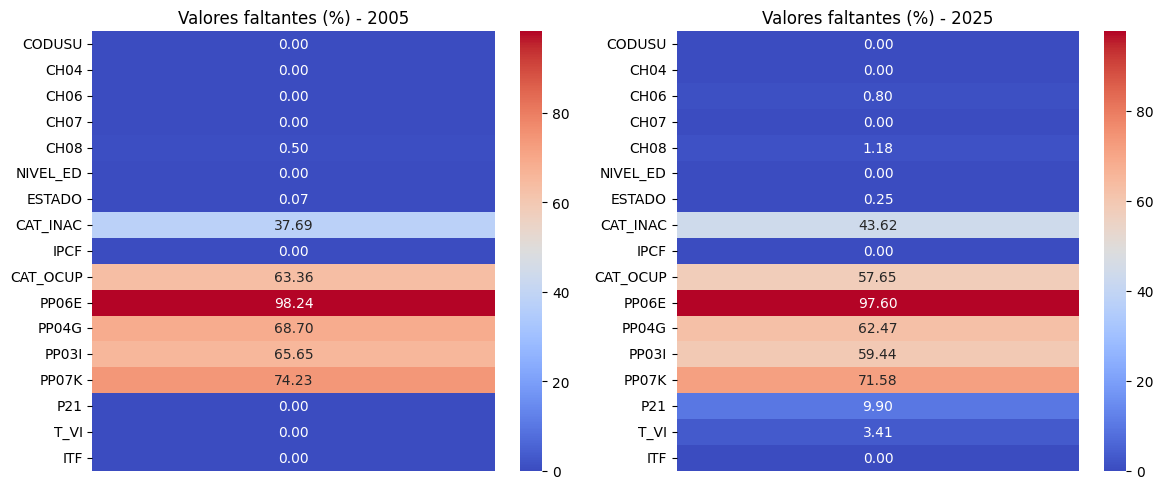

In [39]:
# Contar NaN por año y columna en porcentaje
na_counts = db_recorte.groupby("ANO4").apply(lambda x: x.isna().mean() * 100)

# Crear subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Iterar sobre los años
for i, year in enumerate([2005, 2025]):
    sns.heatmap(
        na_counts.loc[year].to_frame(),  # convierto a fila única
        annot=True, fmt=".2f",           # decimales
        cmap="coolwarm",
        cbar=True,                       # dejo la barra de colores en %
        ax=axes[i]
    )
    axes[i].set_title(f"Valores faltantes (%) - {year}")
    axes[i].set_ylabel("")  # saco el label del eje Y
    axes[i].set_xticks([])

plt.tight_layout()
plt.savefig('heatmap_individuos_nulos.png')
plt.show()

## Parte II. Primer Análisis Exploratorio

### Composición de la EPH por sexo, según año de encuesta

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\3259631261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte['Sexo'] = db_recorte['CH04'].map({1: 'Varón', 2: 'Mujer'})
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\3259631261.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(float(tick.get_text())) for tick in ax.get_xticklabels()])


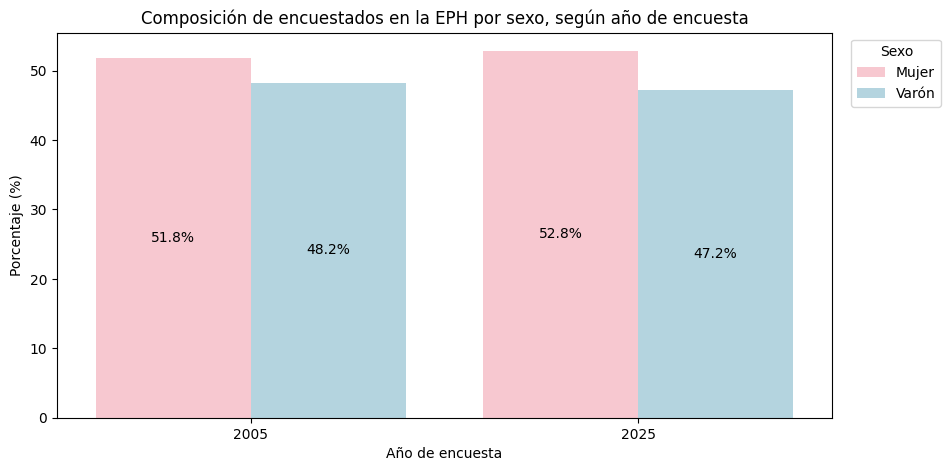

In [40]:
# Crear columna de sexo
db_recorte['Sexo'] = db_recorte['CH04'].map({1: 'Varón', 2: 'Mujer'})

# Calcular counts por año y sexo
counts = db_recorte.groupby(['ANO4','Sexo']).size().reset_index(name='count')

# Calcular porcentaje por año usando transform
counts['pct'] = counts.groupby('ANO4')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=counts,
    x='ANO4',
    y='pct',           # porcentaje en lugar de count
    hue='Sexo',
    palette={'Varón':'lightblue','Mujer':'pink'}
)

# Agregar los valores de porcentaje dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height == 0:   # <- ignorar barras con valor 0
        continue
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height / 2,
        s=f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

# Ajustar ticks del eje X a enteros
ax.set_xticklabels([int(float(tick.get_text())) for tick in ax.get_xticklabels()])

# Leyenda
ax.legend(title='Sexo', loc='upper right', bbox_to_anchor=(1.15,1))

plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de encuesta")
plt.title("Composición de encuestados en la EPH por sexo, según año de encuesta")
plt.savefig("composicion_sexo_eph.png",bbox_inches='tight')
plt.show()

### Matriz de correlaciones entre variables

Variables a correlacionar:
- CH04
- CH06
- CH07
- CH08
- NIVEL_ED
- ESTADO
- CAT_INAC
- IPCF

Primero, desdoblamos las variables que correspondan entre variables dummies.
Estas serán:
- CH04 (Sexo)
- CH07 (Estado civil)
- CH08 (Tipo de cobertura médica)
- NIVEL_ED (Nivel educativo)
- ESTADO (Condición de actividad)
- CAT_INAC (Categoría de inactividad)

In [114]:
categoricas = ['CH04','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC']
corrpanel = db_recorte.copy()
corrpanel.drop(columns=['Sexo'],inplace=True)

def dummies(variable,codigo,descripcion):
    """ 
    Crea nuevas variables dummies a partir de los argumentos especificados.
    Las referencias son:
    - Variable: es el 'código' a desdoblar en dummies (CH04, CH06, etc.)
    - Código: es la categoría dentro de la variable que se quiere generar como una dummy (que adopte '1' en la fila en la que figura, '0' si no figura, o 'NaN' si originalmente la columna está vacía)
    - Descripción: es la descripción del código de la variable

    Ejemplo:
    La variable CH07 indica el estado civil.
    Sus código son:
        - 1: unido
        - 2: casado:
        - 3: separado
        - 4: viudo
        - 5: soltero

    Entonces, la declaracion de 'dummies(CH07,5,Soltero) generará una columna con título 'Soltero' que tendrá '1' como valor en las filas donde fuera '5' el código en 'CH04', '0' si no lo fuera y 'NaN' si fuera vacío. 
    """
    mask_valid = corrpanel[variable].notna()
    corrpanel.loc[mask_valid & (corrpanel[variable] == int(codigo)), descripcion] = 1
    corrpanel.loc[mask_valid & (corrpanel[variable] != int(codigo)), descripcion] = 0

In [115]:
dummies('CH04',1,'Varón')
dummies('CH04',2,'Mujer')
print(corrpanel)

                               CODUSU  CH04  CH06  CH07  CH08  NIVEL_ED  \
ANO4                                                                      
2005.0                       125012     2.0  38.0   4.0   4.0       1.0   
2005.0                       125012     1.0  21.0   1.0   1.0       1.0   
2005.0                       125012     2.0  21.0   1.0   4.0       3.0   
2005.0                       125012     1.0  16.0   5.0   4.0       1.0   
2005.0                       125012     2.0  14.0   5.0   4.0       2.0   
...                               ...   ...   ...   ...   ...       ...   
2025.0  TQRMNORSXHMOKUCDEFOCD00882445   2.0  27.0   5.0   4.0       4.0   
2025.0  TQRMNORSXHMOKUCDEFOCD00882445   1.0  31.0   5.0   4.0       3.0   
2025.0  TQRMNOUYVHMOKPCDEGIBJ00882481   2.0  44.0   3.0   3.0       7.0   
2025.0  TQRMNOUYVHMOKPCDEGIBJ00882481   1.0  24.0   5.0   3.0       3.0   
2025.0  TQRMNOUYVHMOKPCDEGIBJ00882481   2.0  12.0   5.0   3.0       1.0   

        ESTADO  CAT_INAC

In [116]:
dummies('CH07',1,'Unido')
dummies('CH07',2,'Casado')
dummies('CH07',3,'Separado')
dummies('CH07',4,'Viudo')
dummies('CH07',5,'Soltero')
dummies('CH08',1,'OS')
dummies('CH08',2,'Prep.')
dummies('CH08',3,'Publica')
dummies('CH08',4,'-')
dummies('CH08',12,'OS_Prep.')
dummies('CH08',13,'OS_Publica')
dummies('CH08',23,'Prep_Publica')
dummies('CH08',123,'OS_Prep_Publica')
dummies('NIVEL_ED',1,'Prim_inc')
dummies('NIVEL_ED',2,'Prim_com')
dummies('NIVEL_ED',3,'Sec_inc')
dummies('NIVEL_ED',4,'Sec_com')
dummies('NIVEL_ED',5,'Sup_inc')
dummies('NIVEL_ED',6,'Sup_com')
dummies('NIVEL_ED',7,'No_educ')
dummies('ESTADO',1,'Ocupado')
dummies('ESTADO',2,'Desocupado')
dummies('ESTADO',3,'Inactivo')
dummies('ESTADO',4,'Menor_10y')
dummies('CAT_INAC',1,'Jubilado')
dummies('CAT_INAC',2,'Rentista')
dummies('CAT_INAC',3,'Estudiante')
dummies('CAT_INAC',4,'Ama')
dummies('CAT_INAC',5,'Menor_6y')
dummies('CAT_INAC',6,'Discapac')
dummies('CAT_INAC',7,'Otros')

In [117]:
print(corrpanel.columns)

Index(['CODUSU', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO',
       'CAT_INAC', 'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K',
       'P21', 'T_VI', 'ITF', 'Varón', 'Mujer', 'Unido', 'Casado', 'Separado',
       'Viudo', 'Soltero', 'OS', 'Prep.', 'Publica', '-', 'OS_Prep.',
       'OS_Publica', 'Prep_Publica', 'OS_Prep_Publica', 'Prim_inc', 'Prim_com',
       'Sec_inc', 'Sec_com', 'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado',
       'Desocupado', 'Inactivo', 'Menor_10y', 'Jubilado', 'Rentista',
       'Estudiante', 'Ama', 'Menor_6y', 'Discapac', 'Otros'],
      dtype='object')


In [118]:
corrpanel.drop(columns=categoricas,inplace=True)

In [119]:
corrpanel.rename(columns={'-':'Sin_cobertura'}, inplace = True)

In [120]:
print(corrpanel.columns)

Index(['CODUSU', 'CH06', 'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I',
       'PP07K', 'P21', 'T_VI', 'ITF', 'Varón', 'Mujer', 'Unido', 'Casado',
       'Separado', 'Viudo', 'Soltero', 'OS', 'Prep.', 'Publica',
       'Sin_cobertura', 'OS_Prep.', 'OS_Publica', 'Prep_Publica',
       'OS_Prep_Publica', 'Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com',
       'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado', 'Desocupado', 'Inactivo',
       'Menor_10y', 'Jubilado', 'Rentista', 'Estudiante', 'Ama', 'Menor_6y',
       'Discapac', 'Otros'],
      dtype='object')


In [121]:
matrizej = corrpanel.copy()
matrizej.drop(columns = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI'], inplace = True)
print(matrizej.columns)

Index(['CODUSU', 'CH06', 'IPCF', 'ITF', 'Varón', 'Mujer', 'Unido', 'Casado',
       'Separado', 'Viudo', 'Soltero', 'OS', 'Prep.', 'Publica',
       'Sin_cobertura', 'OS_Prep.', 'OS_Publica', 'Prep_Publica',
       'OS_Prep_Publica', 'Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com',
       'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado', 'Desocupado', 'Inactivo',
       'Menor_10y', 'Jubilado', 'Rentista', 'Estudiante', 'Ama', 'Menor_6y',
       'Discapac', 'Otros'],
      dtype='object')


In [122]:
matrizej.rename(columns = {'CH06':'Edad' , 'IPCF': 'Y per-cap fliar'},inplace = True)

In [182]:
matrizej.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO4             10199 non-null  float64
 1   CODUSU           10199 non-null  object 
 2   Edad             10161 non-null  float64
 3   Y per-cap fliar  10199 non-null  float64
 4   ITF              10199 non-null  float64
 5   Varón            10199 non-null  float64
 6   Mujer            10199 non-null  float64
 7   Unido            10199 non-null  float64
 8   Casado           10199 non-null  float64
 9   Separado         10199 non-null  float64
 10  Viudo            10199 non-null  float64
 11  Soltero          10199 non-null  float64
 12  OS               10116 non-null  float64
 13  Prep.            10116 non-null  float64
 14  Publica          10116 non-null  float64
 15  Sin_cobertura    10116 non-null  float64
 16  OS_Prep.         10116 non-null  float64
 17  OS_Publica  

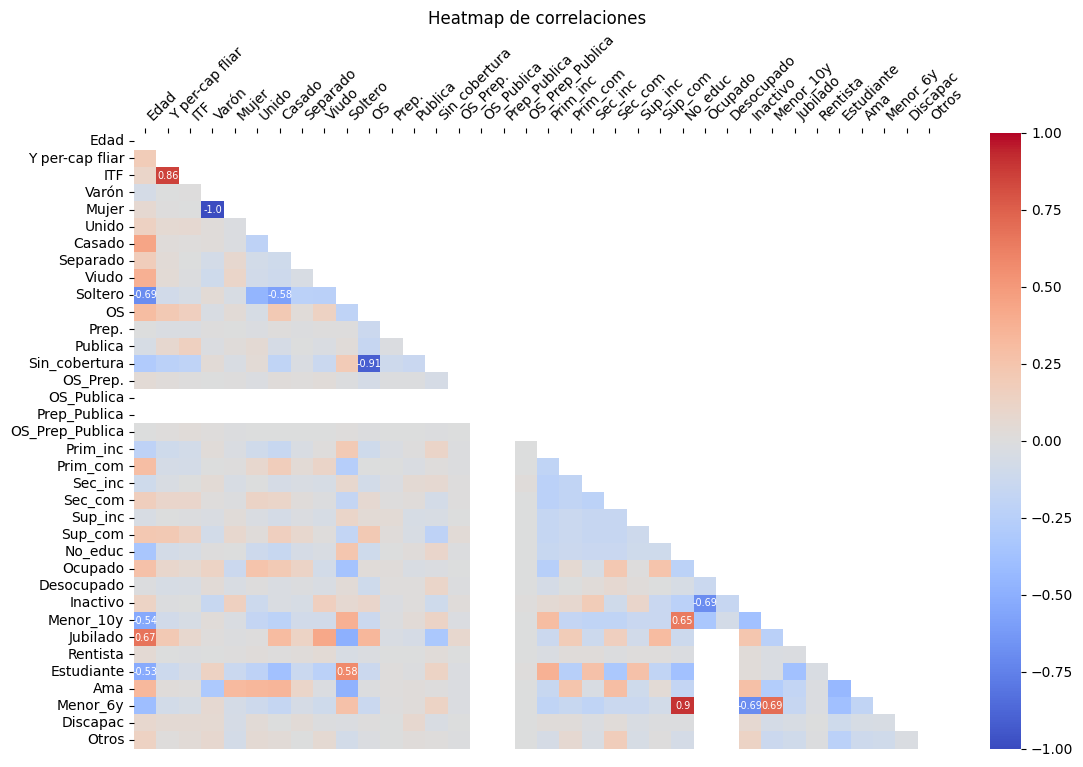

In [123]:
# Crear una copia de matrizej sin la columna 'CODUSU'
matriz_sin_codusu = matrizej.drop(columns=['CODUSU'])

# Matriz de correlaciones
corr = matriz_sin_codusu.corr()

# Máscara para triángulo superior
upp_mat = np.triu(corr)

# Anotaciones selectivas
annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() > 0.5, other="")

plt.figure(figsize=(13,8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    cmap="coolwarm",
    mask=upp_mat,
    annot=annot_masked,
    fmt='',
    cbar=True,
    annot_kws={"color": "white", "fontsize": 7}
)

# Ajustes de ejes
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='left')

plt.title("Heatmap de correlaciones")
plt.savefig("matriz_correl.png", bbox_inches='tight')
plt.show()

## Parte III: Conociendo a los pobres y no-pobres

#### Ejercicio 5:
"¿Cuántas personas no respondieron cuál es su condición de actividad? <br>
Guarden como una base distinta llamada <i>'respondieron'</i> las observaciones donde respondieron la pregunta sobre su ingreso total familiar (ITF). <br>
Las observaciones con ITF=0 guárdenlas en una base bajo el nombre <i>norespondieron.</i>"

In [217]:
respondieron = matrizej[matrizej['ITF'] > 0]
respondieron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8766 entries, 0 to 10198
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO4             8766 non-null   float64
 1   CODUSU           8766 non-null   object 
 2   Edad             8737 non-null   float64
 3   Y per-cap fliar  8766 non-null   float64
 4   ITF              8766 non-null   float64
 5   Varón            8766 non-null   float64
 6   Mujer            8766 non-null   float64
 7   Unido            8766 non-null   float64
 8   Casado           8766 non-null   float64
 9   Separado         8766 non-null   float64
 10  Viudo            8766 non-null   float64
 11  Soltero          8766 non-null   float64
 12  OS               8690 non-null   float64
 13  Prep.            8690 non-null   float64
 14  Publica          8690 non-null   float64
 15  Sin_cobertura    8690 non-null   float64
 16  OS_Prep.         8690 non-null   float64
 17  OS_Publica       8

In [218]:
norespondieron = matrizej[matrizej['ITF'] == 0]
norespondieron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 724 to 10195
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO4             1433 non-null   float64
 1   CODUSU           1433 non-null   object 
 2   Edad             1424 non-null   float64
 3   Y per-cap fliar  1433 non-null   float64
 4   ITF              1433 non-null   float64
 5   Varón            1433 non-null   float64
 6   Mujer            1433 non-null   float64
 7   Unido            1433 non-null   float64
 8   Casado           1433 non-null   float64
 9   Separado         1433 non-null   float64
 10  Viudo            1433 non-null   float64
 11  Soltero          1433 non-null   float64
 12  OS               1426 non-null   float64
 13  Prep.            1426 non-null   float64
 14  Publica          1426 non-null   float64
 15  Sin_cobertura    1426 non-null   float64
 16  OS_Prep.         1426 non-null   float64
 17  OS_Publica      

#### Ejercicio 6:
"Utilizando el archivo <i>tabla_adulto_equiv.xlsx</i>, agreguen a su base de datos una columna llamada <i>adulto_equiv</i> que contenga los valores de adulto equivalente de cada persona según su sexo y edad (por ejemplo, a un varón de 2 años le corresponde 0.46). Finalmente, con el comando 'groupby' sumen esta nueva columna para las personas que pertenecen a un mismo hogar y guarden ese dato en una columna llamada 'ad_equiv_hogar'"

In [219]:
#En el archivo de origen, tabla_adulto_equiv.xlsx, hemos creado una nueva hoja homogeneizando la tabla de equivalencias para que pueda ser correctamente normalizada e interpretada por Pandas
equiv = pd.read_excel("tabla_adulto_equiv.xlsx",sheet_name="Tabla de trabajo")
equiv.set_index('Edad')

,Mujer,Varón
Edad,,
0,0.35,0.35
1,0.37,0.37
2,0.46,0.46
3,0.51,0.51
4,0.55,0.55
...,...,...
72,0.67,0.83
73,0.67,0.83
74,0.67,0.83


In [220]:
# Última fila como fallback
ultima_fila = equiv.iloc[-1]

# Función para buscar equivalencia según Edad y sexo
def buscar_equivalencia(row):
    edad = row['Edad']
    
    # Determinar qué columna usar según la columna de sexo que tenga valor 1
    if row['Varón'] == 1:
        sexo_col = 'Varón'
    elif row['Mujer'] == 1:
        sexo_col = 'Mujer'
    else:
        # Si ninguna columna está activa, devolvemos NaN
        return np.nan
    
    try:
        return equiv.loc[edad, sexo_col]
    except KeyError:
        # Si no se encuentra la edad, usamos el valor de la última fila
        return ultima_fila[sexo_col]

# Aplicar sobre cada fila del dataset
matrizej['adulto_equiv'] = matrizej.apply(buscar_equivalencia, axis=1)

In [221]:
matrizej.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO4             10199 non-null  float64
 1   CODUSU           10199 non-null  object 
 2   Edad             10161 non-null  float64
 3   Y per-cap fliar  10199 non-null  float64
 4   ITF              10199 non-null  float64
 5   Varón            10199 non-null  float64
 6   Mujer            10199 non-null  float64
 7   Unido            10199 non-null  float64
 8   Casado           10199 non-null  float64
 9   Separado         10199 non-null  float64
 10  Viudo            10199 non-null  float64
 11  Soltero          10199 non-null  float64
 12  OS               10116 non-null  float64
 13  Prep.            10116 non-null  float64
 14  Publica          10116 non-null  float64
 15  Sin_cobertura    10116 non-null  float64
 16  OS_Prep.         10116 non-null  float64
 17  OS_Publica  

In [222]:
matrizej['ad_equiv_hogar'] = matrizej.groupby(by=["CODUSU"])['adulto_equiv'].transform('sum')

In [236]:
print(matrizej.sample(5))

         ANO4                         CODUSU  Edad  Y per-cap fliar  \
2340   2005.0                       220027    22.0        95.000000   
7658   2025.0  TQRMNOQWWHKOLLCDEFOCD00858545  67.0    227200.000000   
1207   2005.0                       265352    15.0       458.333333   
1859   2005.0                       172531    15.0       273.333333   
10028  2025.0  TQRMNOTTYHJKKMCDEGIBJ00882325  34.0    380000.000000   

             ITF  Varón  Mujer  Unido  Casado  Separado  ...  Menor_10y  \
2340       570.0    1.0    0.0    0.0     0.0       0.0  ...        0.0   
7658   1136000.0    0.0    1.0    0.0     0.0       0.0  ...        0.0   
1207      1375.0    1.0    0.0    0.0     0.0       0.0  ...        0.0   
1859       820.0    1.0    0.0    0.0     0.0       0.0  ...        0.0   
10028  1520000.0    1.0    0.0    0.0     1.0       0.0  ...        0.0   

       Jubilado  Rentista  Estudiante  Ama  Menor_6y  Discapac  Otros  \
2340        NaN       NaN         NaN  NaN       

In [224]:
respondieron["ad_equiv_hogar"] = respondieron.groupby("CODUSU")["adulto_equiv"].transform("sum")

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\553011164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ad_equiv_hogar"] = respondieron.groupby("CODUSU")["adulto_equiv"].transform("sum")


#### Ejercicio 7:
7. Sabiendo que la Canasta Básica Total para un adulto equivalente en el primer trimestre de 2025 es aproximadamente 365177 Pesos, agreguen a la base <i>respondieron</i> una columna llamada 'ingreso_necesario' que sea el producto de este valor por 'ad_equiv_hogar'. Para el primer trimestre de 2005 la Canasta Básica Total para un adulto equivalente era aproximadamente $205,07. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.


In [226]:
respondieron["ingreso_necesario"] = np.where(
    respondieron["ANO4"] == 2025,
    respondieron["ad_equiv_hogar"] * 365177,
    respondieron["ad_equiv_hogar"] * 205.07
)

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\507253045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"] = np.where(


In [228]:
def es_pobre(ingreso):
    if 'ITF' >= 'ingreso_necesario':
        return 0
    else:
        return 1

In [229]:
respondieron['pobre'] = np.where(respondieron['ITF'] >= respondieron['ingreso_necesario'], 0, 1)

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\2225939225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = np.where(respondieron['ITF'] >= respondieron['ingreso_necesario'], 0, 1)


In [230]:
respondieron[['ITF','ingreso_necesario','pobre']].round(2).sample(5)

,ITF,ingreso_necesario,pobre
3928,1630.0,1691.83,1
1404,630.0,570.09,0
3185,150.0,1062.26,1
548,2150.0,1002.79,0
2520,900.0,969.98,1


#### Ejercicio 8:
8.	Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el 'ITF' es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cuántos pobres identificaron para cada año? ¿Qué porcentaje de la muestra representa?

In [234]:
# Contar pobres y no-pobres por año
conteo = respondieron.groupby("ANO4")["pobre"].value_counts().unstack(fill_value=0)

# Opcional: renombrar las columnas para que queden más descriptivas
conteo = conteo.rename(columns={0: "no_pobres", 1: "pobres"})

print(conteo)

pobre   no_pobres  pobres
ANO4                     
2005.0       2530    2896
2025.0       1664    1676


In [235]:
# Conteo de pobres y no-pobres por año
conteo = respondieron.groupby("ANO4")["pobre"].value_counts().unstack(fill_value=0)
conteo = conteo.rename(columns={0: "no_pobres", 1: "pobres"})

# Convertir a porcentaje por fila
conteo_pct = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Redondear a 1 decimal si querés
conteo_pct = conteo_pct.round(1)

print(conteo_pct)

pobre   no_pobres  pobres
ANO4                     
2005.0       46.6    53.4
2025.0       49.8    50.2


#### Ejercicio 9:
9.	Muestren estadísticas descriptivas relevantes de 'pobre' en una tabla, comparando 2005 con 2025. Además, hagan 2 gráficos exploratorios a elección usando la variable pobre. Comenten.

In [261]:
def stats(columnas):
    """
    Agrupa 'respondieron' por ['ANO4', 'pobre'] y devuelve
    los porcentajes de las columnas indicadas sobre el subtotal de cada año.
    
    columnas: lista de columnas a mostrar.
    """
    df_copy = respondieron.copy()
    # Mapear la columna 'pobre' a nombres legibles
    df_copy['pobre'] = df_copy['pobre'].map({0: 'no_pobre', 1: 'pobre'})
    
    # Agrupamos y sumamos
    grupo = df_copy.groupby(['ANO4', 'pobre'])[columnas].sum()
    
    # Convertimos a porcentajes dentro de cada ANO4
    porcentaje = grupo.groupby(level=0).apply(lambda x: 100 * x / x.sum())
    
    # Redondeamos
    porcentaje = porcentaje.round(2)
    
    return porcentaje

In [262]:
stats('ITF')

ANO4    ANO4    pobre   
2005.0  2005.0  no_pobre    71.48
                pobre       28.52
2025.0  2025.0  no_pobre    66.62
                pobre       33.38
Name: ITF, dtype: float64

In [264]:
respondieron.columns

Index(['ANO4', 'CODUSU', 'Edad', 'Y per-cap fliar', 'ITF', 'Varón', 'Mujer',
       'Unido', 'Casado', 'Separado', 'Viudo', 'Soltero', 'OS', 'Prep.',
       'Publica', 'Sin_cobertura', 'OS_Prep.', 'OS_Publica', 'Prep_Publica',
       'OS_Prep_Publica', 'Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com',
       'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado', 'Desocupado', 'Inactivo',
       'Menor_10y', 'Jubilado', 'Rentista', 'Estudiante', 'Ama', 'Menor_6y',
       'Discapac', 'Otros', 'adulto_equiv', 'ad_equiv_hogar',
       'ingreso_necesario', 'pobre'],
      dtype='object')

In [267]:
stats(['Varón','Mujer'])

Varón  Mujer
ANO4   ANO4   pobre                 
2005.0 2005.0 no_pobre  46.10  47.12
              pobre     53.90  52.88
2025.0 2025.0 no_pobre  48.75  50.76
              pobre     51.25  49.24

In [268]:
stats(['Unido','Casado','Separado','Viudo','Soltero'])

Unido  Casado  Separado  Viudo  Soltero
ANO4   ANO4   pobre                                            
2005.0 2005.0 no_pobre  39.62   60.79     55.61  67.53    40.04
              pobre     60.38   39.21     44.39  32.47    59.96
2025.0 2025.0 no_pobre  46.37   63.38     59.24  71.61    43.51
              pobre     53.63   36.62     40.76  28.39    56.49

In [269]:
stats(['OS', 'Prep.','Publica', 'Sin_cobertura', 'OS_Prep.', 'OS_Publica', 'Prep_Publica','OS_Prep_Publica'])

OS  Prep.  Publica  Sin_cobertura  OS_Prep.  \
ANO4   ANO4   pobre                                                      
2005.0 2005.0 no_pobre  71.09  60.20      NaN          25.01     84.85   
              pobre     28.91  39.80      NaN          74.99     15.15   
2025.0 2025.0 no_pobre  68.29  68.97    22.73          24.44     83.33   
              pobre     31.71  31.03    77.27          75.56     16.67   

                        OS_Publica  Prep_Publica  OS_Prep_Publica  
ANO4   ANO4   pobre                                                
2005.0 2005.0 no_pobre         NaN           NaN              NaN  
              pobre            NaN           NaN              NaN  
2025.0 2025.0 no_pobre         NaN           NaN            100.0  
              pobre            NaN           NaN              0.0

In [270]:
stats(['Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com','Sup_inc', 'Sup_com', 'No_educ'])

Prim_inc  Prim_com  Sec_inc  Sec_com  Sup_inc  \
ANO4   ANO4   pobre                                                     
2005.0 2005.0 no_pobre     30.29     40.33    40.06    63.54    66.56   
              pobre        69.71     59.67    59.94    36.46    33.44   
2025.0 2025.0 no_pobre     37.38     53.52    33.18    52.40    58.36   
              pobre        62.62     46.48    66.82    47.60    41.64   

                        Sup_com  No_educ  
ANO4   ANO4   pobre                       
2005.0 2005.0 no_pobre    87.78    35.11  
              pobre       12.22    64.89  
2025.0 2025.0 no_pobre    81.17    35.22  
              pobre       18.83    64.78

In [271]:
stats(['Ocupado', 'Desocupado', 'Inactivo','Menor_10y'])

Ocupado  Desocupado  Inactivo  Menor_10y
ANO4   ANO4   pobre                                             
2005.0 2005.0 no_pobre    55.51       32.56     45.83      34.14
              pobre       44.49       67.44     54.17      65.86
2025.0 2025.0 no_pobre    59.04       18.06     48.74      31.32
              pobre       40.96       81.94     51.26      68.68

In [272]:
stats(['Jubilado', 'Rentista', 'Estudiante', 'Ama', 'Menor_6y','Discapac', 'Otros'])

Jubilado  Rentista  Estudiante    Ama  Menor_6y  \
ANO4   ANO4   pobre                                                       
2005.0 2005.0 no_pobre     75.58     66.67       37.77  43.90     35.98   
              pobre        24.42     33.33       62.23  56.10     64.02   
2025.0 2025.0 no_pobre     89.03     50.00       32.57  40.45     32.56   
              pobre        10.97     50.00       67.43  59.55     67.44   

                        Discapac  Otros  
ANO4   ANO4   pobre                      
2005.0 2005.0 no_pobre     20.00  31.41  
              pobre        80.00  68.59  
2025.0 2025.0 no_pobre     60.47  46.03  
              pobre        39.53  53.97

In [ ]:
# Crear columna de sexo
db_recorte['Sexo'] = db_recorte['CH04'].map({1: 'Varón', 2: 'Mujer'})

# Calcular counts por año y sexo
counts = db_recorte.groupby(['ANO4','Sexo']).size().reset_index(name='count')

# Calcular porcentaje por año usando transform
counts['pct'] = counts.groupby('ANO4')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=counts,
    x='ANO4',
    y='pct',           # porcentaje en lugar de count
    hue='Sexo',
    palette={'Varón':'lightblue','Mujer':'pink'}
)

# Agregar los valores de porcentaje dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height == 0:   # <- ignorar barras con valor 0
        continue
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height / 2,
        s=f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

# Ajustar ticks del eje X a enteros
ax.set_xticklabels([int(float(tick.get_text())) for tick in ax.get_xticklabels()])

# Leyenda
ax.legend(title='Sexo', loc='upper right', bbox_to_anchor=(1.15,1))

plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de encuesta")
plt.title("Composición de encuestados en la EPH por sexo, según año de encuesta")
plt.savefig("composicion_sexo_eph.png",bbox_inches='tight')
plt.show()

In [325]:
#Renombre de columnas para mejorar la exposición de gráficos:
respondieron.rename(columns={'Menor_10y':'Menor de 10 años','Educación':'Nivel educativo'}, inplace = True)

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\1189449974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.rename(columns={'Menor_10y':'Menor de 10 años','Educación':'Nivel educativo'}, inplace = True)


In [319]:
# Queremos armar un bar-plot con las distintas dimensiones de análisis. Para eso, volvemos a construir columnas como en la estructura original del dataset (no en variables dummies, sino categóricas)

# Definición de listas
cobertura = ['OS', 'Prep.', 'Publica', 'Sin_cobertura',
             'OS_Prep.', 'OS_Publica', 'Prep_Publica', 'OS_Prep_Publica']

estado_civil = ['Unido','Casado','Separado','Viudo','Soltero']

condicion_ocupacion = ['Ocupado', 'Desocupado', 'Inactivo','Menor de 10 años']

educacion = ['Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com',
             'Sup_inc', 'Sup_com', 'No_educ']

condicion_inactividad = ['Jubilado', 'Rentista', 'Estudiante', 'Ama',
                         'Menor_6y','Discapac', 'Otros']

# Función auxiliar para consolidar columnas one-hot en una sola
def consolidar(df, cols, nueva_col):
    df[nueva_col] = df[cols].apply(
        lambda row: row.index[row.eq(1)].tolist()[0] if row.eq(1).any() else np.nan,
        axis=1
    )

# Aplicación a cada grupo
consolidar(respondieron, cobertura, 'Cobertura Médica')
consolidar(respondieron, estado_civil, 'Estado Civil')
consolidar(respondieron, condicion_ocupacion, 'Condición de Ocupación')
consolidar(respondieron, educacion, 'Nivel educativo')
consolidar(respondieron, condicion_inactividad, 'Condición de Inactividad')

C:\Users\franc\AppData\Local\Temp\ipykernel_38360\3957802513.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_col] = df[cols].apply(
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\3957802513.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_col] = df[cols].apply(
C:\Users\franc\AppData\Local\Temp\ipykernel_38360\3957802513.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [321]:
respondieron

,ANO4,CODUSU,Edad,Y per-cap fliar,ITF,Varón,Mujer,Unido,Casado,Separado,...,Otros,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,Cobertura Médica,Estado Civil,Condición de Ocupación,Nivel educativo,Condición de Inactividad
0,2005.0,125012,38.0,36.00,360.0,0.0,1.0,0.0,0.0,0.0,...,NaN,0.77,7.16,1.468301e+03,1,Sin_cobertura,Viudo,Ocupado,Prim_inc,NaN
1,2005.0,125012,21.0,36.00,360.0,1.0,0.0,1.0,0.0,0.0,...,NaN,1.02,7.16,1.468301e+03,1,OS,Unido,Ocupado,Prim_inc,NaN
2,2005.0,125012,21.0,36.00,360.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.76,7.16,1.468301e+03,1,Sin_cobertura,Unido,Inactivo,Sec_inc,Ama
3,2005.0,125012,16.0,36.00,360.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.03,7.16,1.468301e+03,1,Sin_cobertura,Soltero,Inactivo,Prim_inc,Estudiante
4,2005.0,125012,14.0,36.00,360.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.76,7.16,1.468301e+03,1,Sin_cobertura,Soltero,Inactivo,Prim_com,Estudiante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,2025.0,TQRMNOQSQHMOKUCDEFOCD00882444,10.0,127400.00,637000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.79,3.92,1.431494e+06,1,Sin_cobertura,Soltero,Inactivo,Prim_inc,Estudiante
10192,2025.0,TQRMNOQSQHMOKUCDEFOCD00882444,2.0,127400.00,637000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.46,3.92,1.431494e+06,1,Sin_cobertura,Soltero,Menor de 10 años,No_educ,Menor_6y
10196,2025.0,TQRMNOUYVHMOKPCDEGIBJ00882481,44.0,137666.67,413000.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.77,2.53,9.238978e+05,1,Publica,Separado,Inactivo,No_educ,Ama
10197,2025.0,TQRMNOUYVHMOKPCDEGIBJ00882481,24.0,137666.67,413000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.02,2.53,9.238978e+05,1,Publica,Soltero,Inactivo,Sec_inc,Ama


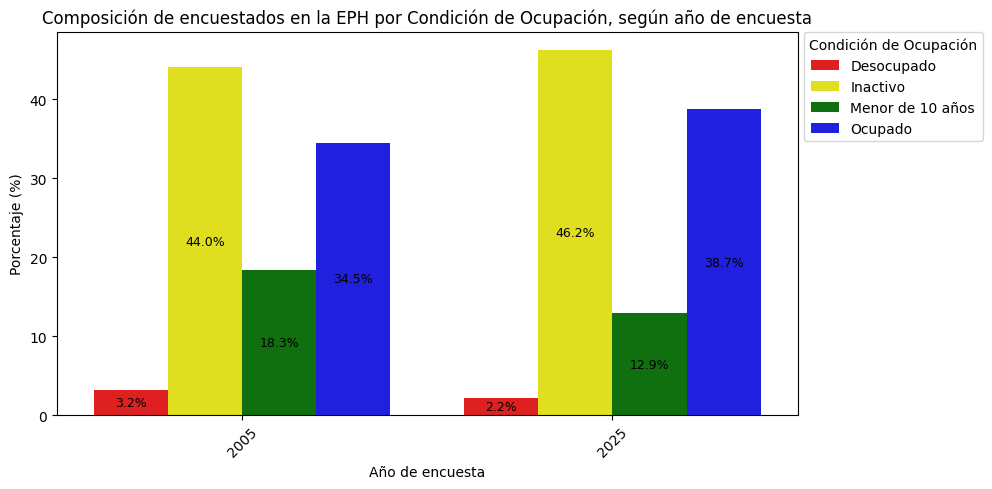

In [334]:
# Calcular counts por año y condición de ocupación 
counts = respondieron.groupby(['ANO4','Condición de Ocupación']).size().reset_index(name='count')

# Calcular porcentaje por año sobre el total de cada año
counts['pct'] = counts.groupby('ANO4')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=counts,
    x='ANO4',
    y='pct',
    hue='Condición de Ocupación',
    palette = {'Desocupado': 'red',     # rojo oscuro
               'Ocupado': 'blue',
               'Menor de 10 años': 'green',
               'Inactivo': 'yellow'}
)    

# Agregar los valores de porcentaje dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height == 0:   
        continue
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height / 2,
        s=f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )

# Ajustar ticks del eje X a los valores de ANO4, como enteros
ax.set_xticks(range(len(counts['ANO4'].unique())))  # posiciones de las barras
ax.set_xticklabels([int(ano) for ano in sorted(counts['ANO4'].unique())], rotation=45)

# Leyenda
ax.legend(
    title='Condición de Ocupación',
    loc='upper right',          # esquina sup. derecha
    bbox_to_anchor=(1.25, 1),   # empuja la leyenda hacia afuera
    borderaxespad=0
)
plt.tight_layout()
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de encuesta")
plt.title("Composición de encuestados en la EPH por Condición de Ocupación, según año de encuesta")
plt.tight_layout()
plt.savefig("pobreza_segun_condicion_de_ocupacion.png",bbox_inches='tight')
plt.show()

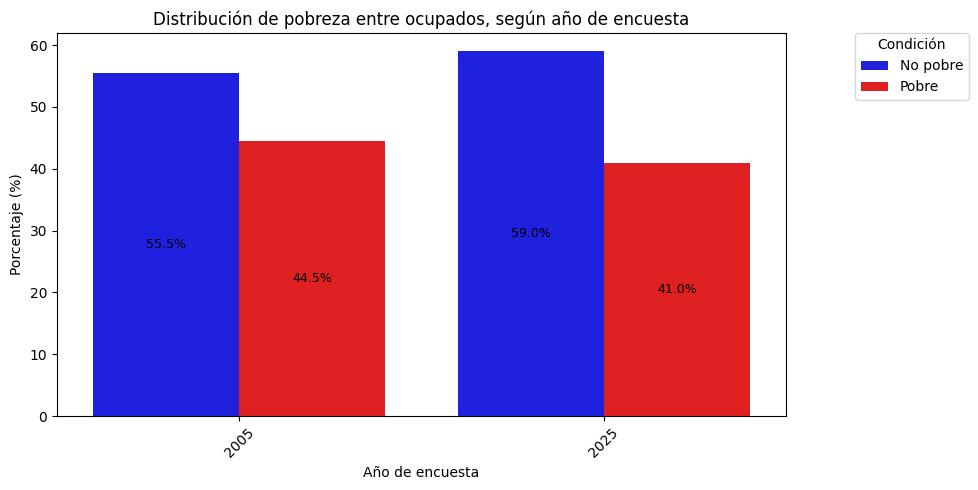

In [335]:
# Filtrar solo filas donde Ocupado == 1
df_ocupados = respondieron[respondieron['Ocupado'] == 1].copy()

# Reemplazar valores de 'pobre' para la leyenda
df_ocupados['pobre_label'] = df_ocupados['pobre'].replace({1: 'Pobre', 0: 'No pobre'})

# Contar frecuencias por año y pobreza
counts = df_ocupados.groupby(['ANO4', 'pobre_label']).size().reset_index(name='count')

# Calcular porcentaje relativo por año
counts['pct'] = counts.groupby('ANO4')['count'].transform(lambda x: 100 * x / x.sum())

# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=counts,
    x='ANO4',
    y='pct',
    hue='pobre_label',
    palette={'Pobre': 'red', 'No pobre': 'blue'}
)

# Agregar los valores de porcentaje dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height/2,
        s=f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )

# Ajustar ticks del eje X a los valores de ANO4 como enteros
anos = sorted(counts['ANO4'].unique())
ax.set_xticks(range(len(anos)))
ax.set_xticklabels([int(ano) for ano in anos], rotation=45)

# Leyenda en esquina superior derecha (afuera)
ax.legend(
    title='Condición',
    loc='upper right',
    bbox_to_anchor=(1.25, 1),
    borderaxespad=0
)

plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de encuesta")
plt.title("Distribución de pobreza entre ocupados, según año de encuesta")
plt.tight_layout()
plt.savefig("distrib_pobreza_ocupados.png",bbox_inches='tight')
plt.show()
